In [59]:
#Import Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [60]:
#Import Data
CSV_file = '/Users/michelleliau_82/Downloads/owid-covid-data.csv'
CovidData = pd.read_csv(CSV_file)
CovidData.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,24/02/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25/02/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26/02/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27/02/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28/02/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [92]:
# Import variables
CovidSubData = pd.DataFrame(CovidData[['location','date','total_cases','total_deaths','stringency_index','population_density','median_age','aged_65_older','gdp_per_capita','extreme_poverty','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers','hospital_beds_per_thousand','life_expectancy','human_development_index']])
CovidSubData.head()

,location,date,total_cases,total_deaths,stringency_index,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Afghanistan,24/02/2020,5.0,NaN,8.33,54.422,18.6,2.581,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511
1,Afghanistan,25/02/2020,5.0,NaN,8.33,54.422,18.6,2.581,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511
2,Afghanistan,26/02/2020,5.0,NaN,8.33,54.422,18.6,2.581,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511
3,Afghanistan,27/02/2020,5.0,NaN,8.33,54.422,18.6,2.581,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511
4,Afghanistan,28/02/2020,5.0,NaN,8.33,54.422,18.6,2.581,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511


In [93]:
#Drop the invalid values(those with NaN)
CovidCleanData = CovidSubData.dropna()
CovidCleanData.head()

,location,date,total_cases,total_deaths,stringency_index,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
2224,Albania,11/03/2020,12.0,1.0,51.85,104.871,38.0,13.188,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795
2225,Albania,12/03/2020,23.0,1.0,51.85,104.871,38.0,13.188,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795
2226,Albania,13/03/2020,33.0,1.0,78.70,104.871,38.0,13.188,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795
2227,Albania,14/03/2020,38.0,1.0,78.70,104.871,38.0,13.188,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795
2228,Albania,15/03/2020,42.0,1.0,81.48,104.871,38.0,13.188,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795


In [94]:
#Calculate the case_fatality_rate of every countries
CovidCleanData['case_fatality_rate']= CovidCleanData['total_deaths']/CovidCleanData['total_cases']
CovidCleanData.head(500)

/var/folders/tj/w3m1mr153dggjk2z988cc5tr0000gn/T/ipykernel_3363/3690963720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CovidCleanData['case_fatality_rate']= CovidCleanData['total_deaths']/CovidCleanData['total_cases']


,location,date,total_cases,total_deaths,stringency_index,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,case_fatality_rate
2224,Albania,11/03/2020,12.0,1.0,51.85,104.871,38.0,13.188,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,0.083333
2225,Albania,12/03/2020,23.0,1.0,51.85,104.871,38.0,13.188,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,0.043478
2226,Albania,13/03/2020,33.0,1.0,78.70,104.871,38.0,13.188,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,0.030303
2227,Albania,14/03/2020,38.0,1.0,78.70,104.871,38.0,13.188,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,0.026316
2228,Albania,15/03/2020,42.0,1.0,81.48,104.871,38.0,13.188,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,0.023810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719,Albania,19/07/2021,132697.0,2456.0,37.96,104.871,38.0,13.188,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,0.018508
2720,Albania,20/07/2021,132740.0,2456.0,37.96,104.871,38.0,13.188,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,0.018502
2721,Albania,21/07/2021,132763.0,2456.0,37.96,104.871,38.0,13.188,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,0.018499
2722,Albania,22/07/2021,132797.0,2456.0,37.96,104.871,38.0,13.188,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,0.018494


In [95]:
#Create a list of unique countries in the 'CovinCleanData' DataFrame
country_list = []
for i in CovidCleanData['location']:
    if i not in country_list:# only country is not already in 'country_list' will added to the list
        country_list.append(i)
country_list

['Albania',
 'Algeria',
 'Argentina',
 'Australia',
 'Austria',
 'Bangladesh',
 'Belgium',
 'Benin',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Gambia',
 'Georgia',
 'Ghana',
 'Greece',
 'Haiti',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Kazakhstan',
 'Kenya',
 'Kyrgyzstan',
 'Laos',
 'Latvia',
 'Liberia',
 'Lithuania',
 'Luxembourg',
 'Malawi',
 'Malaysia',
 'Malta',
 'Mauritius',
 'Mexico',
 'Moldova',
 'Mongolia',
 'Morocco',
 'Mozambique',
 'Myanmar',
 'Nepal',
 'Niger',
 'Norway',
 'Pakistan',
 'Panama',
 'Paraguay',
 'Portugal',
 'Romania',
 'Russia',
 'Seychelles',
 'Slovakia',
 'South Africa',
 'South Korea',
 'Spain',
 'Sri Lanka',
 'Sweden',
 'Tanzania',
 'Thailand',
 'Timor',
 'Togo',
 'Tunisia',
 'Turkey',
 'Ug

In [97]:
# Create a list of DataFrames that contins the latest data for a given country
country_df = []
for i in country_list:
    country = CovidCleanData.loc[CovidCleanData['location']==i].reset_index().drop(['index'],axis=1)
    extracted_data = pd.DataFrame(country[['location', 'gdp_per_capita', 'human_development_index', 'total_cases','total_deaths','case_fatality_rate','stringency_index','population_density','median_age','aged_65_older','extreme_poverty','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers','hospital_beds_per_thousand','life_expectancy',]])
    country_df.append(pd.DataFrame(extracted_data.iloc[-1]).T.reset_index().drop(['index'],axis=1)) #select only the last row of 'extracted data' which contain the latest data for that country

# Concatenate DataFrames in the list vertically
df_concat = pd.concat(country_df, axis=0, ignore_index=True)

# Display the concatenated DataFrame as a table
display(df_concat)

,location,gdp_per_capita,human_development_index,total_cases,total_deaths,case_fatality_rate,stringency_index,population_density,median_age,aged_65_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
0,Albania,11803.431,0.795,333806.0,3595.0,0.01077,11.11,104.871,38.0,13.188,1.1,304.195,10.08,7.1,51.2,2.89,78.57
1,Algeria,13913.839,0.748,271228.0,6881.0,0.02537,11.11,17.348,29.1,6.211,0.5,278.364,6.73,0.7,30.4,1.9,76.88
2,Argentina,18933.907,0.845,9891139.0,130124.0,0.013156,14.38,16.177,31.9,11.198,0.6,191.032,5.5,16.2,27.7,5.0,76.67
3,Australia,44648.71,0.944,11131707.0,17052.0,0.001532,11.11,3.202,37.9,15.504,0.5,107.791,5.07,13.0,16.5,3.84,83.44
4,Austria,45436.686,0.922,5705093.0,21443.0,0.003759,35.19,106.749,44.4,19.202,0.7,145.183,6.35,28.4,30.9,7.37,81.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Uruguay,20551.409,0.817,1011988.0,7562.0,0.007472,13.89,19.751,35.6,14.655,0.1,160.708,6.93,14.0,19.9,2.8,77.91
85,Vietnam,6171.884,0.704,11525231.0,43186.0,0.003747,23.15,308.127,32.6,7.15,2.0,245.465,6.0,1.0,45.9,2.6,75.4
86,Yemen,1479.147,0.47,11945.0,2159.0,0.180745,5.56,53.508,20.3,2.922,18.8,495.003,5.35,7.6,29.2,0.7,66.12
87,Zambia,3689.251,0.584,334425.0,4024.0,0.012033,8.33,22.995,17.7,2.48,57.5,234.499,3.94,3.1,24.7,2.0,63.89


In [98]:
#Extract out the first row/values of human_development_index and gdp_per_capita
hdi_list = []
gdp_list =[]
Covid_df = pd.DataFrame([])
for country in country_df:
    hdi = country['human_development_index'][0]
    gdp = country['gdp_per_capita'][0]
    hdi_list.append(hdi)
    gdp_list.append(gdp)
    Covid_df = pd.concat([Covid_df, country], axis=0).reset_index().drop(['index'], axis=1)
Covid_df.head()

,location,gdp_per_capita,human_development_index,total_cases,total_deaths,case_fatality_rate,stringency_index,population_density,median_age,aged_65_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
0,Albania,11803.431,0.795,333806.0,3595.0,0.01077,11.11,104.871,38.0,13.188,1.1,304.195,10.08,7.1,51.2,2.89,78.57
1,Algeria,13913.839,0.748,271228.0,6881.0,0.02537,11.11,17.348,29.1,6.211,0.5,278.364,6.73,0.7,30.4,1.9,76.88
2,Argentina,18933.907,0.845,9891139.0,130124.0,0.013156,14.38,16.177,31.9,11.198,0.6,191.032,5.5,16.2,27.7,5.0,76.67
3,Australia,44648.71,0.944,11131707.0,17052.0,0.001532,11.11,3.202,37.9,15.504,0.5,107.791,5.07,13.0,16.5,3.84,83.44
4,Austria,45436.686,0.922,5705093.0,21443.0,0.003759,35.19,106.749,44.4,19.202,0.7,145.183,6.35,28.4,30.9,7.37,81.54


In [99]:
#Check the data type
Covid_df.dtypes

location                      object
gdp_per_capita                object
human_development_index       object
total_cases                   object
total_deaths                  object
case_fatality_rate            object
stringency_index              object
population_density            object
median_age                    object
aged_65_older                 object
extreme_poverty               object
cardiovasc_death_rate         object
diabetes_prevalence           object
female_smokers                object
male_smokers                  object
hospital_beds_per_thousand    object
life_expectancy               object
dtype: object

In [100]:
# Create data Frame for the variables that are numerical values 
num_var = pd.DataFrame(Covid_df.drop(['location'],axis = 1))

#Change the data type in 'Covid_df' data frame to float except location
for var in num_var:
    Covid_df[var]=Covid_df[var].astype(float)
Covid_df.dtypes

location                       object
gdp_per_capita                float64
human_development_index       float64
total_cases                   float64
total_deaths                  float64
case_fatality_rate            float64
stringency_index              float64
population_density            float64
median_age                    float64
aged_65_older                 float64
extreme_poverty               float64
cardiovasc_death_rate         float64
diabetes_prevalence           float64
female_smokers                float64
male_smokers                  float64
hospital_beds_per_thousand    float64
life_expectancy               float64
dtype: object

In [101]:
#Extract out human_development_index and gdp_per_capita of every countries for clustering
hdi_df = pd.DataFrame(hdi_list, columns=['human_development_index'])
gdp_df = pd.DataFrame(gdp_list, columns=['gdp_per_capita'])
country_df = pd.DataFrame(country_list,columns=['country_name'])

#Create a joint dataframe of human_development_index and gdp_per_capita of every countries 
country_hdi_gdp_df = pd.concat([country_df,hdi_df, gdp_df], axis=1)
country_hdi_gdp_df.head()

,country_name,human_development_index,gdp_per_capita
0,Albania,0.795,11803.431
1,Algeria,0.748,13913.839
2,Argentina,0.845,18933.907
3,Australia,0.944,44648.710
4,Austria,0.922,45436.686


## Clustering into developed and develping countries

In [102]:
#Extract the Features from hdi_gdp_df
hdi_gdp_df = pd.DataFrame(country_hdi_gdp_df[['human_development_index','gdp_per_capita']])

In [103]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Divided into 2 Clusters
num_clust = 2 #(k value)

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)

# Fit the Clustering Model on the Data
kmeans.fit(hdi_gdp_df)

KMeans(n_clusters=2)

<b>Labeling the Clusters in the Data

In [104]:
#Predict the Cluster Labels
labels = kmeans.predict(hdi_gdp_df)
labels

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1], dtype=int32)

In [105]:
# Add a new column to the'dataframe' DataFrame with the cluster labels for each country
Covid_df['Cluster']=pd.Categorical(labels)
Covid_df['Cluster']

0     1
1     1
2     1
3     0
4     0
     ..
84    1
85    1
86    1
87    1
88    1
Name: Cluster, Length: 89, dtype: category
Categories (2, int64): [0, 1]

In [106]:
Covid_df.head(50)

,location,gdp_per_capita,human_development_index,total_cases,total_deaths,case_fatality_rate,stringency_index,population_density,median_age,aged_65_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,Cluster
0,Albania,11803.431,0.795,333806.0,3595.0,0.010770,11.11,104.871,38.0,13.188,1.1,304.195,10.08,7.1,51.2,2.890,78.57,1
1,Algeria,13913.839,0.748,271228.0,6881.0,0.025370,11.11,17.348,29.1,6.211,0.5,278.364,6.73,0.7,30.4,1.900,76.88,1
2,Argentina,18933.907,0.845,9891139.0,130124.0,0.013156,14.38,16.177,31.9,11.198,0.6,191.032,5.50,16.2,27.7,5.000,76.67,1
3,Australia,44648.710,0.944,11131707.0,17052.0,0.001532,11.11,3.202,37.9,15.504,0.5,107.791,5.07,13.0,16.5,3.840,83.44,0
4,Austria,45436.686,0.922,5705093.0,21443.0,0.003759,35.19,106.749,44.4,19.202,0.7,145.183,6.35,28.4,30.9,7.370,81.54,0
5,Bangladesh,3523.984,0.632,2037125.0,29440.0,0.014452,13.89,1265.036,27.5,5.098,14.8,298.003,8.38,1.0,44.7,0.800,72.59,1
6,Belgium,42658.576,0.931,4668248.0,33228.0,0.007118,14.81,375.564,41.8,18.571,0.2,114.898,4.29,25.1,31.4,5.640,81.63,0
7,Benin,2064.236,0.545,27982.0,163.0,0.005825,11.11,99.110,18.8,3.244,49.6,235.848,0.99,0.6,12.3,0.500,61.77,1
8,Bosnia and Herzegovina,11713.895,0.780,400992.0,16227.0,0.040467,25.93,68.496,42.5,16.569,0.2,329.635,10.08,30.2,47.7,3.500,77.40,1
9,Brazil,14103.452,0.765,36331281.0,693853.0,0.019098,22.22,25.040,33.5,8.552,3.4,177.961,8.11,10.1,17.9,2.200,75.88,1


Text(0.5, 0, 'human_development_index')

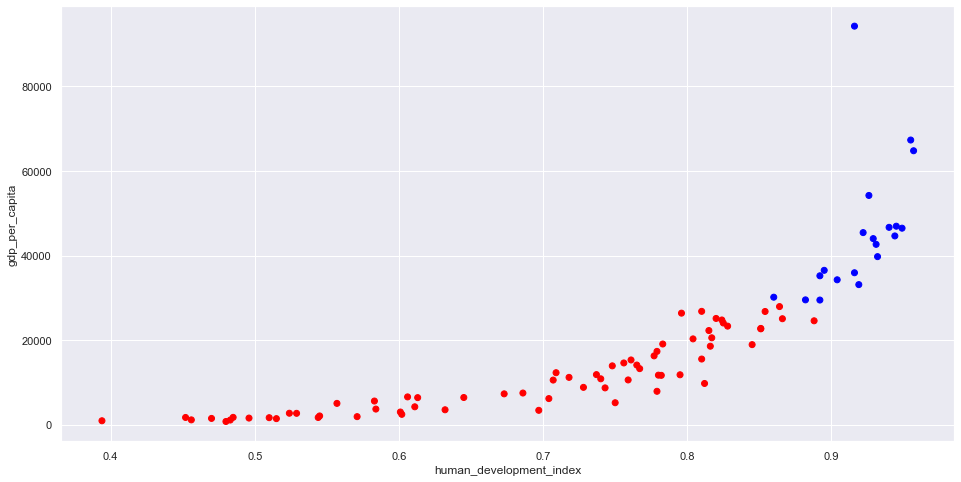

In [107]:
#Visulaize the Cluster in the Data
f,axes=plt.subplots(figsize=(16,8))
plt.scatter(x='human_development_index',y='gdp_per_capita',c='Cluster',cmap='bwr',data=Covid_df)
axes.set_ylabel("gdp_per_capita")
axes.set_xlabel("human_development_index")

- Cluster in blue is the developed countries
- Cluster in red is the developing countries

## Analysis

In [108]:
# Split the 'Covid_df' into developed and developing clusters
developing = pd.DataFrame(Covid_df.loc[Covid_df['Cluster']==0]).reset_index().drop(['index'], axis=1)
developed = pd.DataFrame(Covid_df.loc[Covid_df['Cluster']==1]).reset_index().drop(['index'], axis=1)
developed.head()

,location,gdp_per_capita,human_development_index,total_cases,total_deaths,case_fatality_rate,stringency_index,population_density,median_age,aged_65_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,Cluster
0,Albania,11803.431,0.795,333806.0,3595.0,0.010770,11.11,104.871,38.0,13.188,1.1,304.195,10.08,7.1,51.2,2.89,78.57,1
1,Algeria,13913.839,0.748,271228.0,6881.0,0.025370,11.11,17.348,29.1,6.211,0.5,278.364,6.73,0.7,30.4,1.90,76.88,1
2,Argentina,18933.907,0.845,9891139.0,130124.0,0.013156,14.38,16.177,31.9,11.198,0.6,191.032,5.50,16.2,27.7,5.00,76.67,1
3,Bangladesh,3523.984,0.632,2037125.0,29440.0,0.014452,13.89,1265.036,27.5,5.098,14.8,298.003,8.38,1.0,44.7,0.80,72.59,1
4,Benin,2064.236,0.545,27982.0,163.0,0.005825,11.11,99.110,18.8,3.244,49.6,235.848,0.99,0.6,12.3,0.50,61.77,1


In [109]:
num_developing = len(developing)
num_developed = len(developed)
print('Number of developed countries:\t',num_developed)
print('Number of developing countries:\t',num_developing)

Number of developed countries:	 69
Number of developing countries:	 20


Developed countries CFR mean:	 0.019269086880923054
Developing countries CFR mean:	 0.0056474939114810555


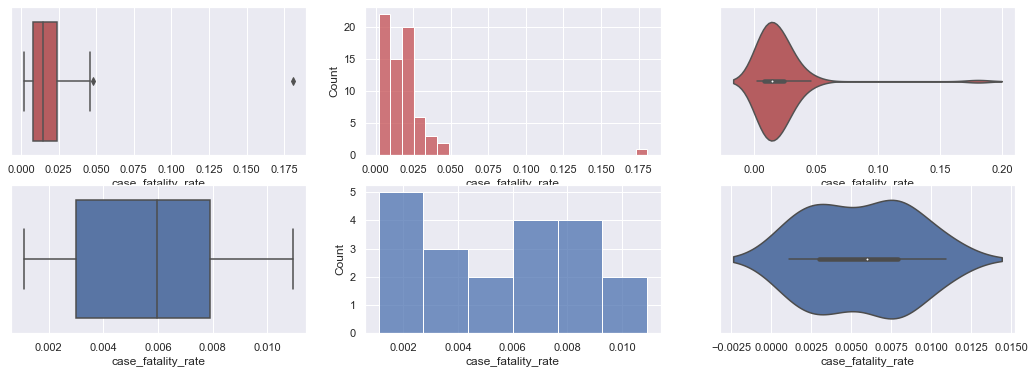

In [117]:
#Compare the case_fatality_rate between developed and developing countries
f,axes = plt.subplots(2,3,figsize=(18,6))
sb.boxplot(x ='case_fatality_rate',data = developed, orient='h', color = 'r', ax = axes[0,0])
sb.histplot(x ='case_fatality_rate',data = developed ,color = 'r', ax = axes[0,1])
sb.violinplot(x ='case_fatality_rate',data = developed, orient='h', color = 'r', ax = axes[0,2])

sb.boxplot(x ='case_fatality_rate',data = developing, orient='h',color = 'b', ax = axes[1,0])
sb.histplot(x ='case_fatality_rate',data = developing ,color = 'b', ax = axes[1,1])
sb.violinplot(x ='case_fatality_rate',data = developing, orient='h', color = 'b', ax = axes[1,2])

print('Developed countries CFR mean:\t',developed['case_fatality_rate'].mean())
print('Developing countries CFR mean:\t',developing['case_fatality_rate'].mean())

<b>Visualize through Heat Map

In [118]:
#Create a new dataFrame which just contains columns with just numerical values
developed_df = developed.drop(['location','Cluster'],axis = 1)
developing_df = developing.drop(['location','Cluster'],axis = 1)
developed_df.head()

,gdp_per_capita,human_development_index,total_cases,total_deaths,case_fatality_rate,stringency_index,population_density,median_age,aged_65_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
0,11803.431,0.795,333806.0,3595.0,0.010770,11.11,104.871,38.0,13.188,1.1,304.195,10.08,7.1,51.2,2.89,78.57
1,13913.839,0.748,271228.0,6881.0,0.025370,11.11,17.348,29.1,6.211,0.5,278.364,6.73,0.7,30.4,1.90,76.88
2,18933.907,0.845,9891139.0,130124.0,0.013156,14.38,16.177,31.9,11.198,0.6,191.032,5.50,16.2,27.7,5.00,76.67
3,3523.984,0.632,2037125.0,29440.0,0.014452,13.89,1265.036,27.5,5.098,14.8,298.003,8.38,1.0,44.7,0.80,72.59
4,2064.236,0.545,27982.0,163.0,0.005825,11.11,99.110,18.8,3.244,49.6,235.848,0.99,0.6,12.3,0.50,61.77


<AxesSubplot:>

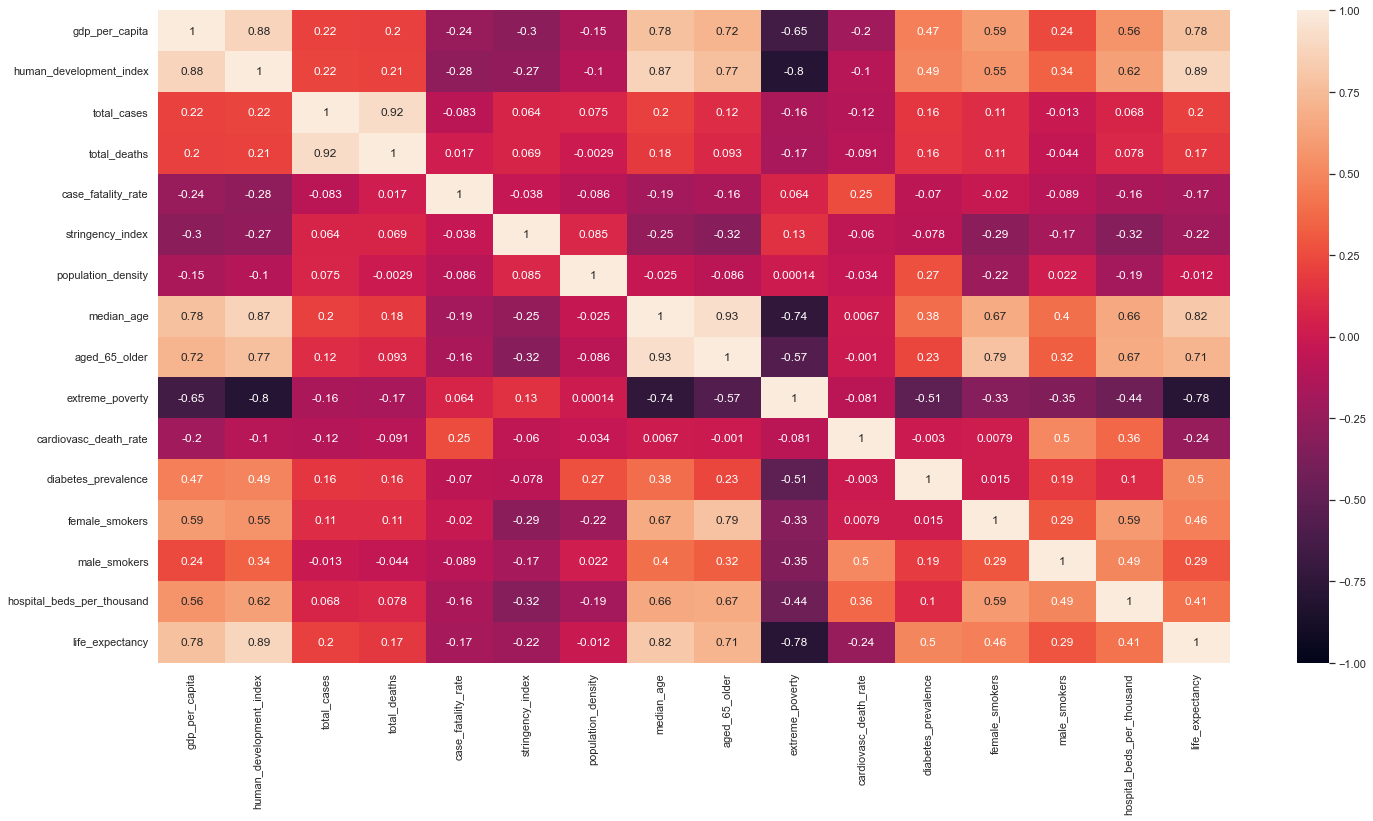

In [119]:
# Create heatmap for developed countries
plt.figure(figsize=(24,12))
sb.heatmap(developed.corr(),vmin = -1,vmax = 1,annot = True)

From the heatmap, we can know that 

<AxesSubplot:>

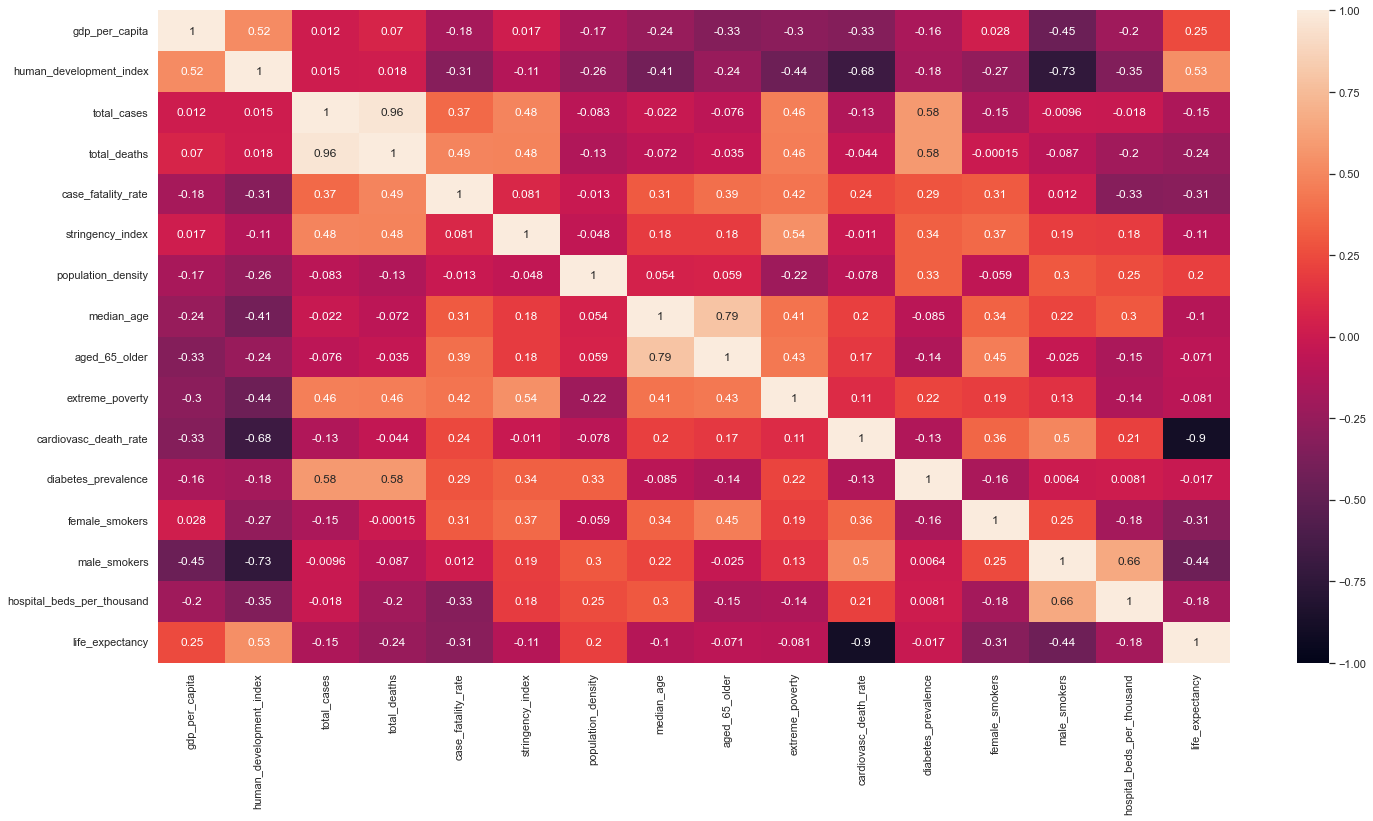

In [120]:
# Create heatmap for developing countries
plt.figure(figsize=(24,12))
sb.heatmap(developing.corr(),vmin = -1,vmax = 1,annot = True)